# Roach Comparison

Date: January 31st, 2025

Author: Jonah Lee

In this analysis, I compare the time-domain and frequency-domain common-mode signals across BLAST-TNG ROACH 1 through 5.

In [1]:
# %matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.signal as signal
import seaborn as sns
import pandas as pd

In [2]:
data_dir = os.path.join(os.getcwd(), 'common_modes')
roach_files = {
    1: 'roach1_it2.npy',
    2: 'roach2_it2.npy',
    3: 'roach3_it2.npy',
    4: 'roach4_it2.npy',
    5: 'roach5_it2.npy',
}

roaches = roach_files.keys()

common_modes = {}
for roach, file in roach_files.items():
    common_modes[roach] = np.load(os.path.join(data_dir, file), allow_pickle=True)
common_modes = pd.DataFrame(common_modes)

In [3]:
ctffts = {}
sampling_freq = 476.5  # Hz, average (see time_slicing.ipynb)
freq_axis = np.fft.rfftfreq(common_modes[1].size, 1/sampling_freq)
for roach in roaches:
    ctffts[roach] = np.fft.rfft(common_modes[roach])
ctffts = pd.DataFrame(ctffts)

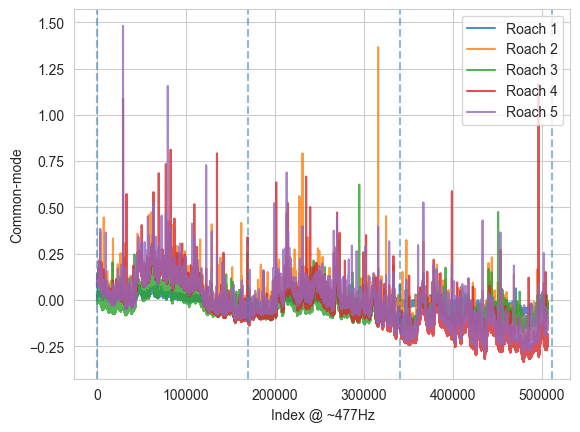

In [4]:
pass_indices = [0, 169450, 340400, 511900]

plt.clf()
for roach in roaches:
    plt.plot(common_modes[roach], label=f'Roach {roach}', alpha=0.8)
for pass_num, i in enumerate(pass_indices):
    plt.axvline(x=i, alpha=0.5, linestyle='--')
plt.legend(loc='upper right')
plt.xlabel("Index @ ~477Hz")
plt.ylabel("Common-mode")
plt.show()

# for roach_num in (1, 2, 3, 4, 5):
#     plt.plot(common_modes[roach_num], label=f'Roach {roach_num}', alpha=0.8)
#     plt.legend()
#     plt.xlabel("Index @ ~477Hz")
#     plt.ylabel("Common-mode")
#     plt.show()

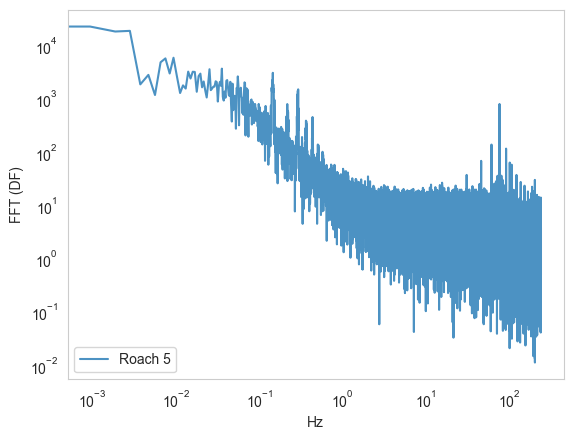

In [5]:
# for roach in roaches:
#     plt.plot(freq_axis, np.abs(ctffts[roach]), label=f'Roach {roach}', alpha=0.8)
#     plt.legend()
#     plt.xscale('log')
#     plt.yscale('log')
#     plt.xlabel("Hz")
#     plt.ylabel("FFT (DF)")
#     plt.grid()
#     plt.show()
plt.clf()
for roach in [5]:
    plt.plot(freq_axis, np.abs(ctffts[roach]), label=f'Roach {roach}', alpha=0.8)
# plt.axvline(x=75, alpha=0.5, linestyle='--', c='r', label='75Hz')
# plt.axvline(x=60, alpha=0.5, linestyle='--', c='g', label='60Hz')
plt.isinteractive()
plt.legend(loc='lower left')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Hz")
plt.ylabel("FFT (DF)")
plt.grid()
plt.show()

In [6]:
ct_filtered = {}
for roach in roaches:
    # ct_filtered[roach] = signal.convolve(common_modes[roach], signal.windows.gaussian(5000, 200))
    ct_filtered[roach] = signal.savgol_filter(common_modes[roach], 3000, 1)

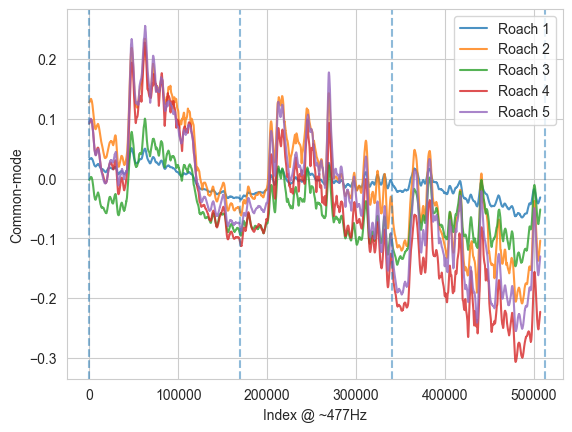

In [7]:
plt.clf()
for roach in roaches:
    plt.plot(ct_filtered[roach], label=f'Roach {roach}', alpha=0.8)
for pass_num, i in enumerate(pass_indices):
    plt.axvline(x=i, alpha=0.5, linestyle='--')
plt.legend(loc='upper right')
plt.xlabel("Index @ ~477Hz")
plt.ylabel("Common-mode")
plt.show()

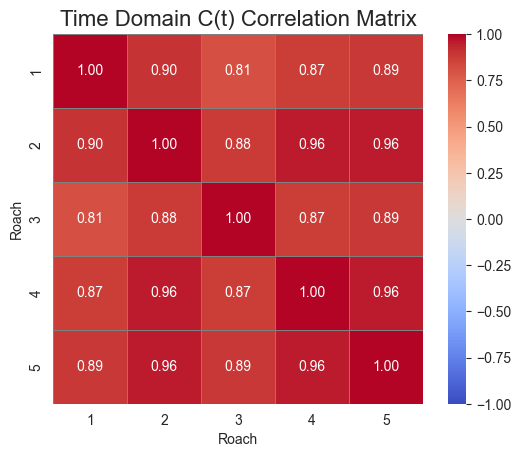

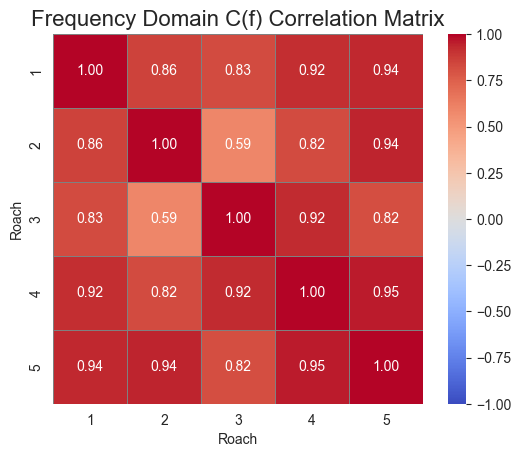

In [13]:
plt.clf()
sns.heatmap(common_modes.corr(), annot=True, fmt=".2f", cmap='coolwarm',
            vmin=-1, vmax=1, cbar=True, square=True,
            linewidths=0.5, linecolor='gray')
plt.title(f"Time Domain C(t) Correlation Matrix", fontsize=16)
plt.xlabel("Roach")
plt.ylabel("Roach")
plt.show()

plt.clf()
sns.heatmap(np.abs(ctffts).corr(), annot=True, fmt=".2f", cmap='coolwarm',
            vmin=-1, vmax=1, cbar=True, square=True,
            linewidths=0.5, linecolor='gray')
plt.title(f"Frequency Domain C(f) Correlation Matrix", fontsize=16)
plt.xlabel("Roach")
plt.ylabel("Roach")
plt.show()